<a href="https://colab.research.google.com/github/anjali0503/RECURRENT_NEURAL_NETWORK/blob/main/IMDB_DATASET_MOVIES_REVIEWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-hub
!pip install tensorflow-datasets

In [ ]:
#IMPORTING DEPENDENCIES

import os
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")

Version:  2.6.0
Eager mode:  True
Hub version:  0.12.0
GPU is NOT AVAILABLE


#Download the IMDB dataset


In [ ]:
from tensorflow.python.keras.datasets import imdb

Loading Data

In [ ]:
# Split the training set into 60% and 40% to end up with 15,000 examples
# for training, 10,000 examples for validation and 25,000 examples for testing.
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteGEXB1B/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteGEXB1B/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteGEXB1B/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
train_examples_batch

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell 

In [ ]:
train_labels_batch

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])>

In [ ]:
from keras.datasets import imdb

# Load the data, keeping only 10,000 of the most frequently occuring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
print(type([max(sequence) for sequence in train_data]))

<class 'list'>


In [ ]:
# Find the maximum of all max indexes
max([max(sequence) for sequence in train_data])

9999

This how training data looks

In [ ]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
class_names = ['Negative','Positive']     # 0 FOR NEGATIVE AND 1 FOR POSITIVE

DECODING THE REVIEWS

In [ ]:
# step 1: load the dictionary mappings from word to integer index
word_index = imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
# step 2: reverse word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [ ]:
# Step 3: decode the review, mapping integer indices to words
# indices are off by 3 because 0, 1, and 2 are reserverd indices for "padding", "Start of sequence" and "unknown"
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[1]])

decoded_review

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

In [ ]:
def decode(reviews):
  text = ''
  for i in reviews:
    text += reverse_word_index[i]
    text += ''
  
  return text

In [ ]:
decode(train_data[0])

"theasyouwithoutthemselvespowerfulletslovestheirbecomesreachinghadjournalistoflotfromanyonetohaveafteroutatmospherenevermoreroomanditsoheartshowstoyearsofeverynevergoingandhelpmomentsorofeverychestvisualmovieexceptherwasseveralofenoughmorewithisnowcurrentfilmasyouofminepotentiallyunfortunatelyofyouthanhimthatwithoutthemselveshergetforwascampofyoumoviesometimesmoviethatwithscarybutandtostorywonderfulthatinseeingincharactertoof70smusicianswithhearthadshadowstheyofherethatwithherserioustohavedoeswhenfromwhywhathavecriticstheyisyouthatisn'tonewillverytoasitselfwithotherandinofseenoverlandedforanyoneofandbrshow'stowhetherfromthanoutthemselveshistoryhenamehalfsomebrofandoddwastwomostofmeanfor1anyanboatsheheshouldisthoughtfrogbutofscriptyounotwhilehistoryhehearttorealatbarrelbutwhenfromonebitthenhavetwoofscripttheirwithhernobodymostthatwithwasn'ttowitharmedactingwatchanforwithheartfeltfilmwantan"

In [ ]:
def show_len():
  print('length of the 1st training example :',len(train_data[0]))
  print('lenght of the 2nd training example :',len(train_data[1]))
  print('lenght of the 1st test eg : ',len(test_data[0]))
  print('length of the 2nd test eg :',len(test_data[1]))
show_len()

length of the 1st training example : 218
lenght of the 2nd training example : 189
lenght of the 1st test eg :  68
length of the 2nd test eg : 260


#Preparing the Data


As we cannot feed a list of integers into our deep neural network. We will need to convert them into tensors.


To prepare our data, we will One-hot Encode our lists and turn them into vectors of 0’s and 1’s. This would blow up all of our sequences into 10,000-dimensional vectors containing 1 at all indices corresponding to integers present in that sequence. This vector will have element 0 at all index, which is not present in the integer sequence.
Simply put, the 10,000-dimensional vector corresponding to each review will have
Every index corresponding to a word
Every index with value 1, is a word that is present in the review and is denoted by its integer counterpart.
Every index containing 0 is a word not present in the review.

In [ ]:
# Vectorize input data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))    # Creates an all zero matrix of shape (len(sequences),10K)
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1                        # Sets specific indices of results[i] to 1s
    return results

# Vectorize training Data
X_train = vectorize_sequences(train_data)

# Vectorize testing Data
X_test = vectorize_sequences(test_data)

In [ ]:
X_train[0]


array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
X_train.shape

(25000, 10000)

In [ ]:
# Vectorize labels

y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

Model Training

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# compiling model


model.compile(loss ='binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.python.keras.callbacks import LambdaCallback

In [ ]:
simple_log =LambdaCallback(on_epoch_end = lambda e,l : print(e,end= '.') )

E = 20

h =model.fit(X_train,y_train,validation_split = 0.2,
             epochs = E,
             callbacks = [simple_log],
             verbose = False
)

0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

In [ ]:
h

In [ ]:
# Input for Validation
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

# Labels for validation
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:

history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.2615 - accuracy: 0.9401 - val_loss: 0.0550 - val_accuracy: 0.9854
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0805 - accuracy: 0.9733 - val_loss: 0.0358 - val_accuracy: 0.9928
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0357 - accuracy: 0.9903 - val_loss: 0.0310 - val_accuracy: 0.9905
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0186 - accuracy: 0.9953 - val_loss: 0.0265 - val_accuracy: 0.9901
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0109 - accuracy: 0.9972 - val_loss: 0.0269 - val_accuracy: 0.9901
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0071 - accuracy: 0.9982 - val_loss: 0.0270 - val_accuracy: 0.9903
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0051 - accuracy: 0.9989 - val_loss: 0.0265 - val_accuracy: 0.9903
Epoch 8/20
30

Plotting the prediction and evalution

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

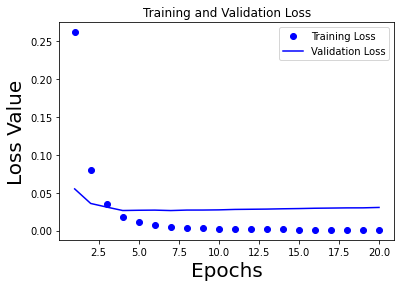

In [ ]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs',fontsize = 20)
plt.ylabel('Loss Value',fontsize = 20)
plt.legend()

plt.show()


In [ ]:
loss, acc = model.evaluate(X_test , y_test)
print('The loss :',loss)
print('The accuracy of the test set :',acc*100)


782/782 [==============================] - 2s 2ms/step - loss: 1.0559 - accuracy: 0.8595
The loss : 1.0559439659118652
The accuracy of the test set : 85.95200181007385


In [ ]:
import numpy as np

np.set_printoptions(suppress=True)
result = model.predict(X_test)

In [ ]:
print(result,end=' ')

[[0.00000159]
 [1.        ]
 [0.99052393]
 ...
 [0.00042832]
 [0.00004099]
 [0.99999714]] 

In [ ]:
result.shape

(25000, 1)

In [ ]:
p = model.predict(np.expand_dims(X_test[76] , axis= 0))
print(class_names[int(p[0]>0.5)])

Negative


In [ ]:
print(X_test[0])

[0. 1. 1. ... 0. 0. 0.]


In [ ]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
    y_pred[i] = 1 if score > 0.5 else 0

In [ ]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(y_pred, y_test)

In [ ]:
error

0.14048